step 1: import modules.

In [73]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import random

step 2: create csv file and let it be filled with data from main.py

In [74]:
#with open('datasets/dataset.csv', 'w', newline='') as file:
    #writer = csv.writer(file)
    #writer.writerow(["x cord", "right_window", "ray Left", "ray Mid Left", "ray Forward", "ray Mid Right", "ray Right", "left_window", "left", "right"])

step 3: open dataframe and remove 3/4 of data with false outputs

In [75]:
data = pd.read_csv('datasets/dataset.csv')

In [76]:
filtered_data = data[(data['left'] != 0) | (data['right'] != 0)]
rows_to_delete = int(4/5 * len(filtered_data))
rows_indices_to_delete = random.sample(filtered_data.index.tolist(), rows_to_delete)
not_deleted_data = filtered_data.drop(rows_indices_to_delete)
not_deleted_data.to_csv('modified_file.csv', index=False)
data.head()

,x cord,right_window,ray Left,ray Mid Left,ray Forward,ray Mid Right,ray Right,left_window,left,right
0,257,100,300,304,400,142,300,100,0,1
1,259,100,300,303,400,140,300,100,0,1
2,261,100,300,302,400,139,300,100,0,1
3,263,100,300,302,400,137,300,100,0,1
4,266,100,300,301,400,135,300,100,0,1


step 4: create variables like train and validantion.

In [77]:
X = data.drop(columns=['left', 'right'])
y = pd.concat([data['left'], data['right']], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

y_train.head()

,left,right
10712,0,0
2895,0,0
18150,0,0
403,0,0
11228,0,0


step 5: Create the model.

In [78]:
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0,2),                    # dropout rate 0.2 is best
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),            
    layers.Dropout(0,2),                    
    layers.Dense(256, activation="relu"),   
    layers.BatchNormalization(),
    layers.Dropout(0,2),
    layers.Dense(2, activation="sigmoid") # sigmoid works better
])

step 6: compile and create early stopping function.

In [79]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

step 7: fit model (possibly also make a model history for graphs).

In [80]:
model_history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=512, epochs=200, callbacks=[early_stopping])

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - binary_accuracy: 0.6517 - loss: 0.7688 - val_binary_accuracy: 0.8549 - val_loss: 0.6202
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9630 - loss: 0.4539 - val_binary_accuracy: 0.9775 - val_loss: 0.4387
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9848 - loss: 0.2855 - val_binary_accuracy: 0.9771 - val_loss: 0.2516
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9885 - loss: 0.1552 - val_binary_accuracy: 0.9769 - val_loss: 0.1701
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9892 - loss: 0.0908 - val_binary_accuracy: 0.9769 - val_loss: 0.1321
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9900 - loss: 0.0652 - val_binary_accuracy: 0.9772 - val_loss: 0.1131
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9898 - loss: 0.0488 - val_binary_accuracy: 0.9777 - val_loss: 0.1047
Epoch 8/200


step 8: copy paste graph stuff

<Axes: title={'center': 'Accuracy'}>

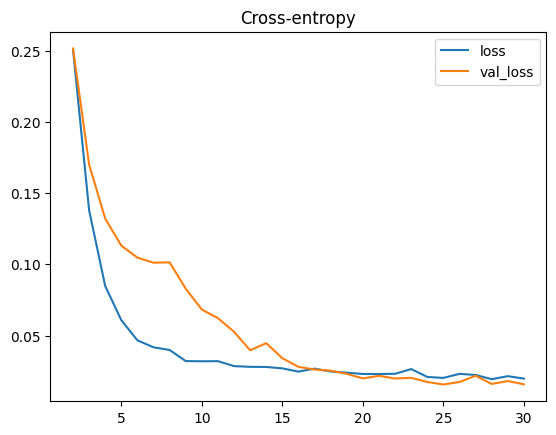

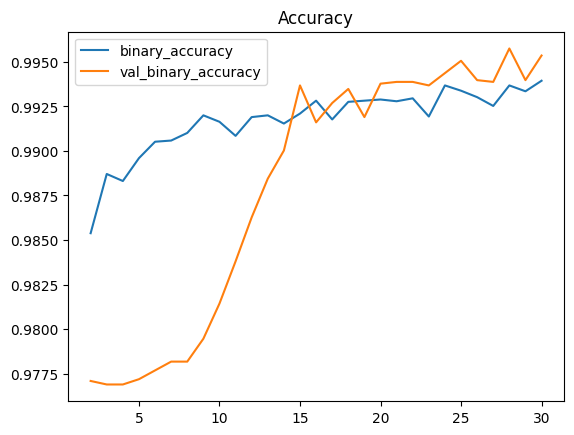

In [81]:
history_df = pd.DataFrame(model_history.history)
history_df.loc[2:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[2:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

stap 9: check if the neural network is really working with a custom question.

In [82]:
import numpy as np

question = pd.DataFrame({'question1': [250,100,300,300,300,300,300,100]})
question_array = question['question1'].to_numpy().reshape(1, -1)

predictions = model.predict(question_array)
binary_predictions = (predictions > 0.5).astype(int)
print(binary_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0 0]]


stap 10: save the model to be used in main.

In [83]:
model.save("/Users/jack/Documents/code/coderclass/python/deeplearning-dragracing/models/DIYModel.h5")